## <center>Exploratory Data Analysis</center>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df_train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_train.shape

(614, 13)

In [5]:
cat_cols = list(df_train.select_dtypes(include=['object']).columns)
num_cols = list(df_train.select_dtypes(exclude=['object']).columns)
print('Numeric columns:',num_cols)
print('Categorical columns:',cat_cols)

Numeric columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


### Missing Values Treatment
### Analyze missing values

In [7]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801


In [9]:
df_train['Gender']           = df_train['Gender'].fillna(df_train['Gender'].dropna().mode().values[0] )
df_train['Married']          = df_train['Married'].fillna(df_train['Married'].dropna().mode().values[0] )
df_train['Dependents']       = df_train['Dependents'].fillna(df_train['Dependents'].dropna().mode().values[0] )
df_train['Self_Employed']    = df_train['Self_Employed'].fillna(df_train['Self_Employed'].dropna().mode().values[0] )
df_train['LoanAmount']       = df_train['LoanAmount'].fillna(df_train['LoanAmount'].dropna().mean())
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].dropna().mode().values[0] )
df_train['Credit_History']   = df_train['Credit_History'].fillna(df_train['Credit_History'].dropna().mode().values[0] )

In [9]:
df_train.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Data visualization

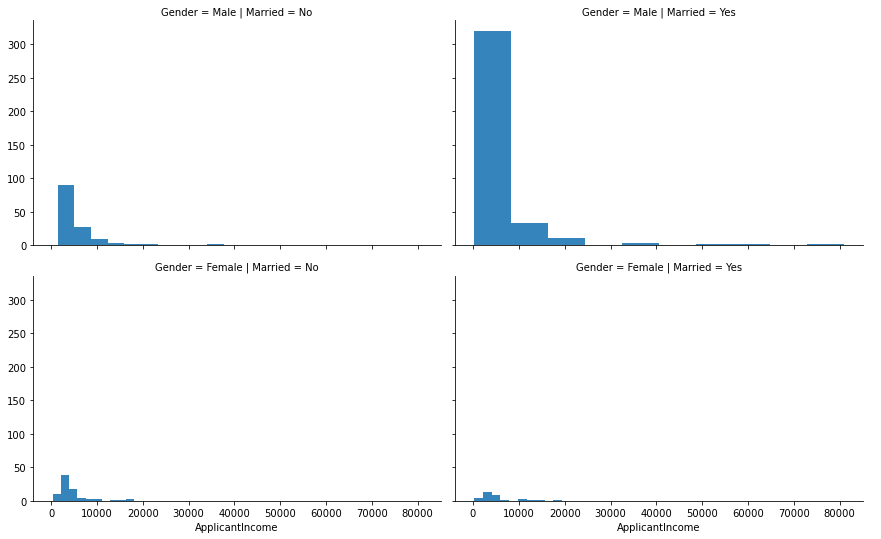

In [28]:
grid = sns.FacetGrid(df_train, row='Gender', col='Married', size=3.8, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.9, bins=10)
grid.add_legend()

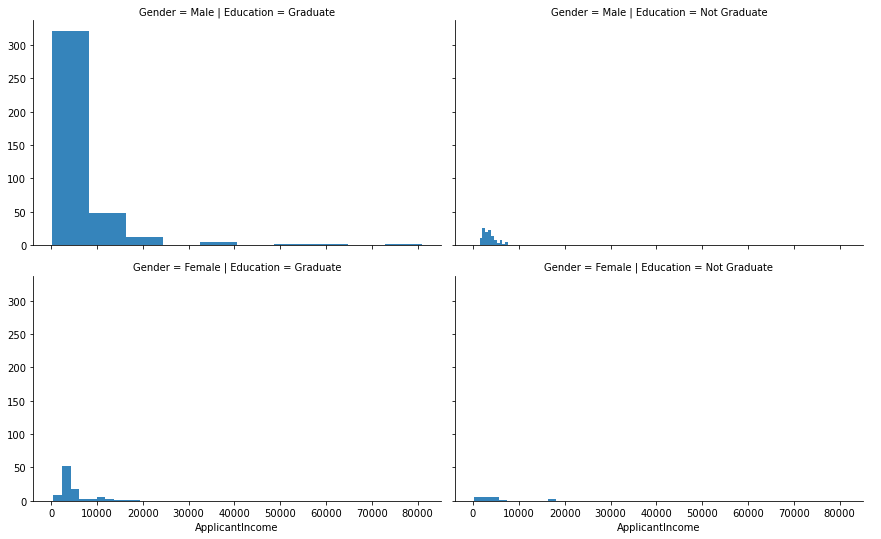

In [27]:
grid = sns.FacetGrid(df_train, row='Gender', col='Education', size=3.8, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.9, bins=10)
grid.add_legend()

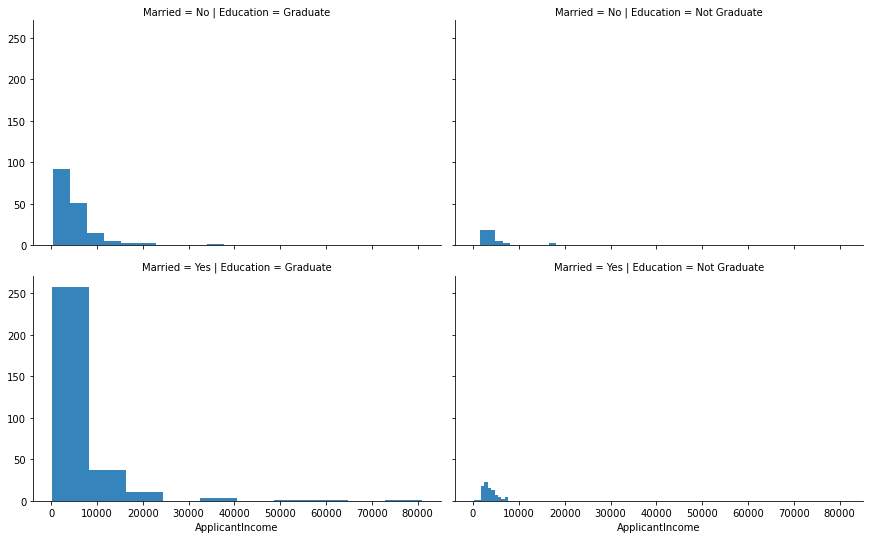

In [26]:

grid = sns.FacetGrid(df_train, row='Married', col='Education', size=3.8, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.9, bins=10)
grid.add_legend()

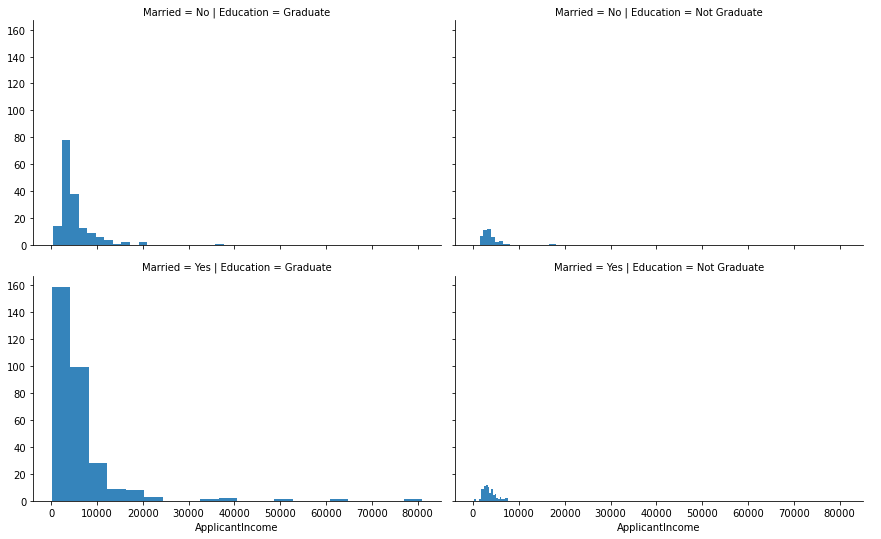

In [34]:
grid = sns.FacetGrid(df_train, row='Married', col='Education', size=3.8, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.9, bins=20)
grid.add_legend()

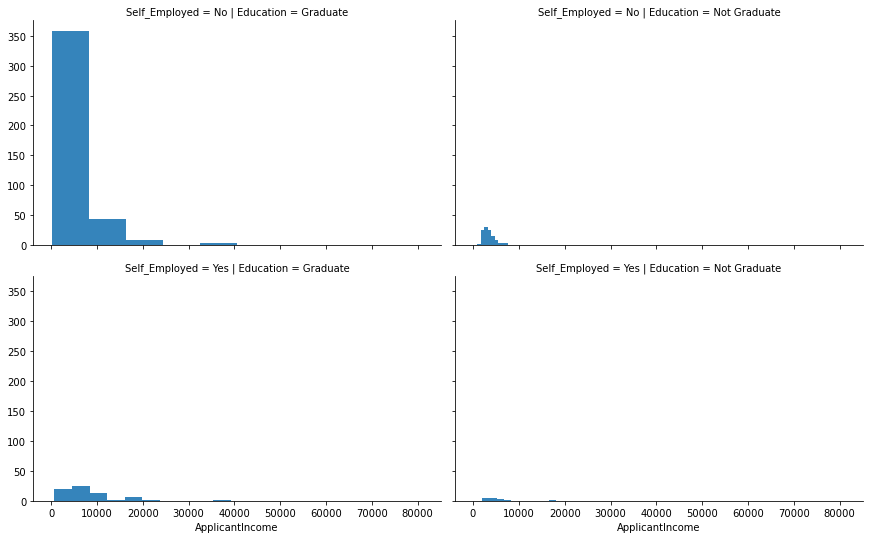

In [35]:

grid = sns.FacetGrid(df_train, row='Self_Employed', col='Education', size=3.8, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.9, bins=10)
grid.add_legend()

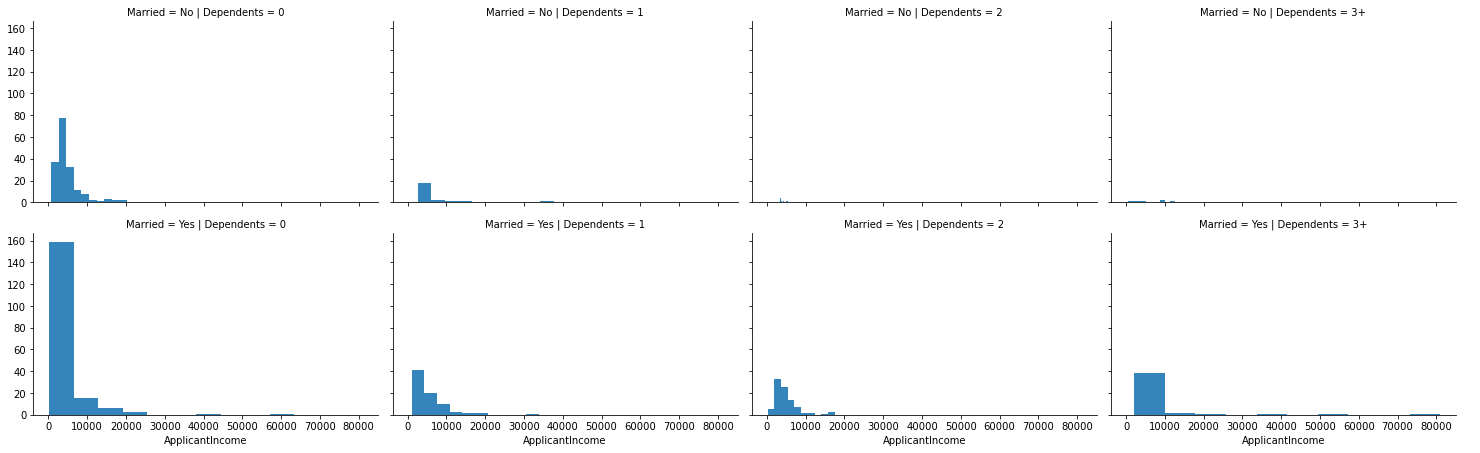

In [39]:
grid = sns.FacetGrid(df_train, row='Married', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.9, bins=10)
grid.add_legend()

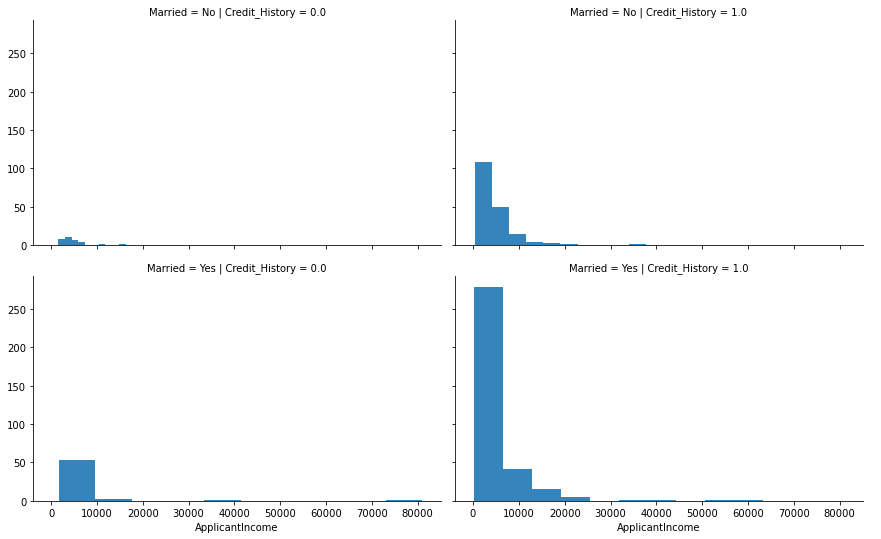

In [40]:

grid = sns.FacetGrid(df_train, row='Married', col='Credit_History', size=3.8, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.9, bins=10)
grid.add_legend()

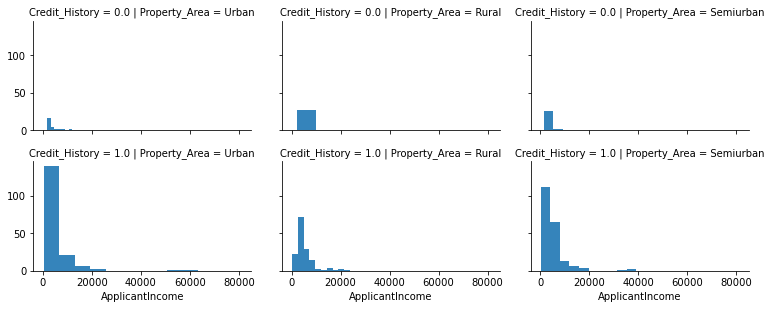

In [41]:

grid = sns.FacetGrid(df_train, row='Credit_History', col='Property_Area', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.9, bins=10)
grid.add_legend()

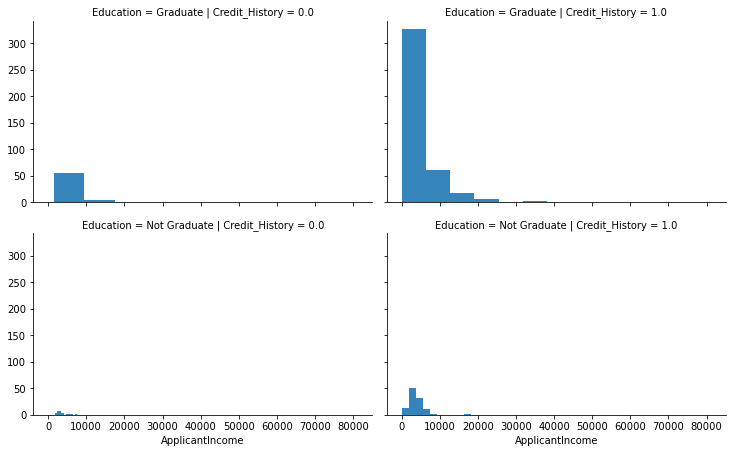

In [44]:
grid = sns.FacetGrid(df_train, row='Education', col='Credit_History', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.9, bins=10)
grid.add_legend()

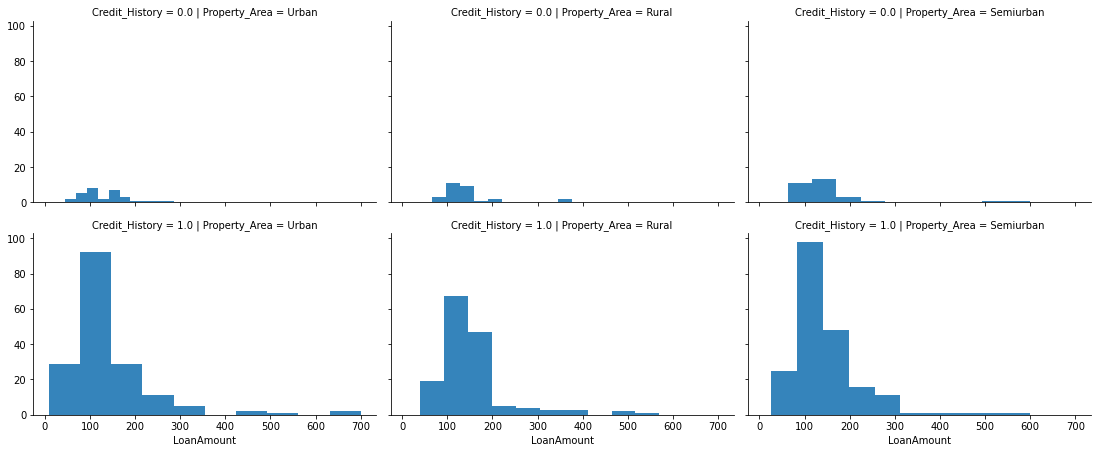

In [45]:
grid = sns.FacetGrid(df_train, row='Credit_History', col='Property_Area', size=3.2, aspect=1.6)
grid.map(plt.hist, 'LoanAmount', alpha=.9, bins=10)
grid.add_legend()